Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Vaja 11: Vizualna kontrola kakovosti
## Navodila
Vizualna kontrola kakovosti je proces razpoznavanja vzorcev na podlagi vizualne oz. slikovne informacije, ki je namenjen podpori pri odločanju o ustreznosti oz. neustreznosti objektov zanimanja. Interpretacija surovih slikovnih podatkov je pogosto zelo zamudna, naporna in včasih tudi zelo zahtevna naloga, zato je smiselno razvijati računalniške postopke za podporo pri odločanju, ki temeljijo na avtomatski analizi, opisovanju in razpoznavanju opazovanih objektov. Splošni sistem za razpoznavanje vzorcev lahko obravnavamo kot zaporedje šestih osnovnih funkcionalnih podsistemov: 
1. zajemanje podatkov, 
2. obdelava in obnova zajetih podatkov, 
3. razgradnja obnovljenih podatkov, 
4. izločanje značilnic, 
5. razvrščanje ter 
6. vrednotenje razvrščanja. 
Pri vaji se bomo spoznali z osnovno razgradnjo slik, izločanjem značilnic in razvrščanjem za problem vizualne kontrole kakovosti farmacevtskih tablet. 

![Sistem vizualne kontrole](images/RV_11_SLO_SistemVizualneKontrole.png)

**Razgradnja** (ang.: image segmentation) združuje postopke, s katerimi sliko razdelimo na osnovna področja oziroma objekte. Razgradnjo bomo izvedli z upragovljanjem slike z osvetlitvijo iz ozadja in z označevanjem objektov. Pri označevanju objektov vsakemu (binarnemu) objektu na sliki priredimo lastno oznako oz. kodo.

**Analizo objektov** v razgrajeni sliki izvedemo z izločanjem značilnic oz. kvantitativnimi opisi lastnosti posameznih področij slike. Posamezno področje slike lahko predstavimo z **zunanjimi lastnostmi** (mejami področja) in/ali **notranjimi lastnostmi** (slikovnimi elementi področja). Zunanje lastnosti omogočajo predstavitev in opisovanje področij z izločanjem značilnic iz mej področij, npr. obseg, usmeritev, največja dolžina, gladkost meje, itd. Notranje lastnosti po drugi strani omogočajo predstavitev in opisovanje pojavnosti področij, kot so npr. homogenost, barva, tekstura, itd. 

Najosnovnejša značilnica **zunanje lastnosti področja** je njegova površina $A$, ki je določena s številom slikovnih elementov področja. Meje področja v binarni sliki (0 – ozadje, 1 - objekt) lahko določimo z Moorovim postopkom sledenja mej. Obseg $P$ področja je enak dolžini njegove meje. Opis oblike področja, ki je neodvisen od velikosti in orientacije objekta je krožno razmerje:
$$
	K = \frac{4\pi A}{P^2}
$$
ki ima vrednost 1 za področja v obliki kroga, sicer pa je manjše od 1. 
K - krožno razmerje

---
![Moorov postopek](images/RV_11_SLO_MoorovPostopek.png)
 Mejo predstavimo kot zaporedje mejnih točk v smeri urinega kazalca:
 1. Določimo začetno točko $b_0$ kot najvišjo in najbolj levo točko z vrednostjo 1 ter označimo s $c_0$ sosednjo točko na levi, ki ima vrednost 0. Preiščemo 8 sosednjih točk začetne točke $b_0$, tako da začnemo v točki $c_0$ in nadaljujemo v smeri urinega kazalca. Z $b_1$ označimo prvo sosednjo točko z vrednostjo 1, s $c_1$ pa točko z vrednostjo 0 tik pred $b_1$ v zaporedju sosednjih točk. Zapomnimo si $b_0$ in $b_1$.
 2. Naj bo $b=b_1$ in $c=c_1$.
 3. Označimo 8 sosednjih točk $n_1, n_2,\ldots, n_8$ točke $b$, ki se začnejo v točki $c$ in se nadaljujejo v smeri urinega kazalca, ter poiščemo prvo točko $n_k$ z vrednostjo 1.
 4. Naj bo $b=n_k$ in $c=n_{k-1}$.
 5. Ponavljamo koraka 3 in 4 dokler ne pridemo do začetne točke $b=b_0$ in za njo najdemo isto naslednjo točko $b_1$.

Po končanem postopku zaporedje točk $b_i$ predstavlja zaporedje zunanjih mejnih točk objekta v smeri urinega kazalca.

---

**Notranje lastnosti področja** najbolj preprosto opišemo s statističnimi momenti sivinskih vrednosti področij slike. Naj bo $p(z)$ verjetnostna porazdelitev sivinskih vrednosti znotraj posameznih področij, ki jo ocenimo z normalizacijo histograma sivinskih vrednosti znotraj posameznih področij slike. Centralni moment $n$-te stopnje izračunamo kot: 

$$
	\mu_n = \sum_{i=0}^{L-1} (z_i - m)^n\, p(z_i),\,\mbox{kjer povprečje $m$ izračunamo kot}\,m=\sum_{i=0}^{L-1}z_i\, p(z_i)
$$

Ničti moment $\mu_0$ je vedno enak 1, prvi moment pa 0. Drugi moment predstavlja varianco $\sigma^2$, ki je značilnica razpršenosti oz. kontrasta sivinskih vrednosti, in ga lahko uporabimo za opis gladkosti področja:

$$
	G = \frac{1}{1 + \sigma^2}
$$

Ta ima vrednost 1 na popolnoma homogenih področjih in se približuje 0 na področjih z veliko varianco.

Teksturo objekta lahko opišemo tudi z osnovnimi komponentami, naprimer tako, da izračunamo gradient slike $\nabla I = [g_x\,\, g_y]^{\mathrm{T}}$ in za področje objekta sestavimo $N\times 2$ matriko gradientov $\mathbf{\nabla I}$ ter določimo kovariančno matriko gradientov $\mathbf{C} = (\mathbf{\nabla I})^{\mathrm{T}} \mathbf{\nabla I}$ z dimenzijami $2\times 2$. Nato določimo lastni vrednosti matrike $\mathbf{C} \rightarrow \lambda_1, \lambda_2$, ki kodirata lastnosti teskture na objektu. Za objekte, kjer je tekstura izrazito orientirana v določeno smer, lahko izpeljemo značilnico:

$$
	R = 1 - \frac{\min\{\lambda_1,\,\lambda_2\}}{\max\{\lambda_1,\,\lambda_2\}}\,.
$$

Značilnica $R$ bo imela vrednost 0, če bo teksura orientirana enakomerno v vse smeri, oziroma vrednost 1, če bo izrazito orientirana v eno smer.

## Naloge
**Gradivo** za vajo vsebuje barvni sliki `osvetlitev-ozadje.jpg` in `osvetlitev-ospredje.jpg`, ki sta bili zajeti z osvetlitvijo objektov zanimanja (farmacevtskih tablet) iz ozadja in ospredja. Na slikah so farmacevtske tablete različnih oblik, barv, tekstur, nekatere tablete pa imajo tudi zarezo. 

1. Naložite sivinsko sliko `osvetlitev-ozadje.jpg` in jo z upragovljanjem pretvorite v binarno sliko tako, da določite optimalen prag $t$, tj. sivinsko vrednost, ki področje tablet loči od ozadja. Optimalni prag $t$ določite s pomočjo histograma sivinske slike. 

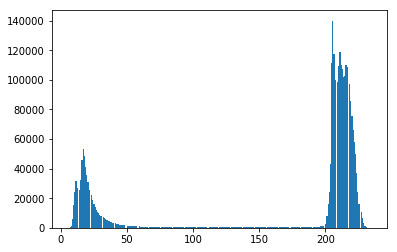

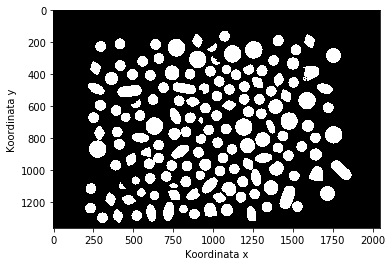

In [1]:
from rvlib import loadImage, toGray, showImage, imageGradient, hist1D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imgB = loadImage('data/osvetlitev-ozadje.jpg')
imgF = loadImage('data/osvetlitev-ospredje.jpg')

# doloci optimalen prag
imgBG = toGray( imgB )
plt.close('all')
plt.hist( imgBG.flatten(), 256 )
# izberi prag
iThr = 100
imgT = 255 * (imgBG < iThr).astype('uint8')
showImage( imgT )

2. Na osnovi upragovljene slike ozadja s preizkusite vpliv funkcij za morfološko filtriranje `erosion()`, `dilation()`, `opening()` in `closing()` v Python knjižnici `skimage.morphology`. Jedro za filtriranje določite s funkcijo `disk()`. 

 Po filtriranju lahko vsakemu objektu pripišite unikatno oznako s funkcijo `label()` v knjižnici `skimage.measure`. Koliko objektov oz. tablet je na sliki? Preverite vpliv morfološkega filtriranja na število zaznanih tablet v sliki.

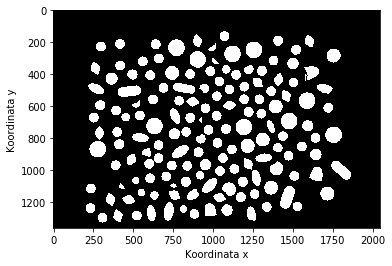

In [2]:
# nalozi knjiznico za morfoloske operacije 
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage.measure import label
# poisci vse objekte na sliki

# erozija
imgE = erosion(imgT, disk(3)) #3-> velikost strukturnega elementa
showImage(imgE)

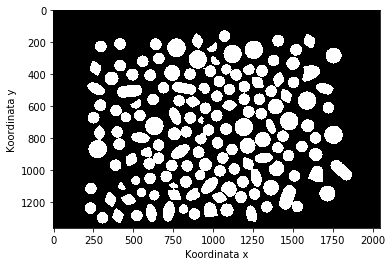

In [3]:
# dilacija
imgD = dilation(imgT, disk(3))
showImage(imgD)

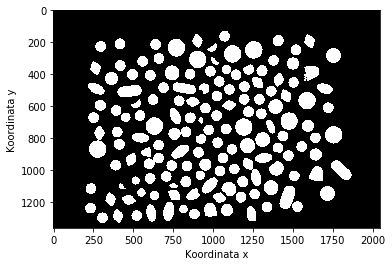

In [4]:
# erozija-dilacija
imgO = opening(imgT, disk(3))
showImage(imgO)

Najdeno stevilo objektov je 152.


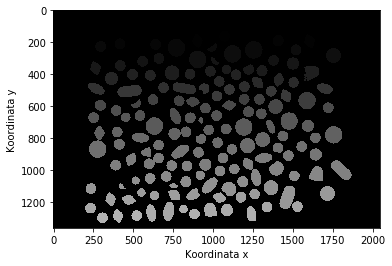

In [5]:
# oznacevanje objektov
iLabel = label( imgO, neighbors=8 )
numL = np.max( iLabel )
print('Najdeno stevilo objektov je %d.' % numL)
# prikazi sliko objektov
showImage( iLabel.astype('uint8') )

3. Napišite funkcijo, ki določi koordinate meje posameznega področja na 2D sliki: 
```python
    def trackContour( iLabel, iObject ):
        return oContour
```
kjer je `iLabel` slika označenih objektov, `iObject` pa je oznaka objekta, katerega mejo želimo določiti. Funkcija vrne spremenljivko `oContour` v obliki matrike $2\times M$ z zaporedjem koordinat meje $[x_i y_i]^{\mathrm{T}},\,i=1,\ldots,M$. 

 Določite meje vseh označenih objektov iz Naloge 1. Prikažite sliko `osvetlitev-ospredje.jpg` 
ter vanjo vrišite meje označenih objektov kot je prikazano na spodnji sliki *levo*. 

In [6]:
def trackContour( iLabel, iObject ):
    """Funkcija za dolocanje konture objekta"""
    # definiraj izhodno spremenljivko
    oContour = np.array( [] )
    # preveri velikost objekta in preskoci objekte 
    # po velikosti manjse od 10 slikovnih elementov
    iObjectMask = iLabel == iObject
    y, x = np.where( iObjectMask )
    if x.size < 10: #majhnih obj. ne obravvnavamo
        print( 'Objekt %d ima velikost %d < 10' % (iObject, x.size) )
        return oContour
    # poisci zacetno tocko na konturi kot zgornjo-levo tocko
    idy = np.where( y == np.min(y) )[0]
    idx = np.where( x[idy] == np.min(x[idy]) )[0]
    oContour = np.array( (x[idy[idx]], y[idy[idx]]) ).reshape( (2,1) )
    # definicija funkcije za iskanje naslednje tocke
    def findNextPoint( iObjectMask, iCurPoint, iOffset ):
        """Funkcija za iskanje naslednje tocke"""
        # preberi velikost slike
        dy, dx = iObjectMask.shape
        # preberi trenuten polozaj
        x, y = iCurPoint
        # definiraj zaporedje odmikov
        lOffsets = np.array( ( (-1,-1,0,1,1,1,0,-1), (0,-1,-1,-1,0,1,1,1) ) )
        sx = lOffsets[0,:]; sy = lOffsets[1,:]        
        lOffsetIdx = np.where( np.sum( np.abs( lOffsets - iOffset ), axis=0 ) == 0 )[0]
        for i in range(len(sx)):
            j = (i + lOffsetIdx) % len(sx)
            if (x+sx[j])<dx and (x+sx[j])>=0 and \
                    (y+sy[j])<dy and (y+sy[j])>=0:
                if iObjectMask[y+sy[j], x+sx[j]]:
                    # doloci koordinate naslednje tocke konture
                    oNextPoint = np.array( (x+sx[j], y+sy[j]) )
                    # doloci koordinate prejsnje tocke zunaj konture
                    oPrevPoint = np.array( (x+sx[j-1], y+sy[j-1]) )
                    return oNextPoint, oPrevPoint-oNextPoint
        return iCurPoint, iOffset
    # iterativno isci tocke na konturi
    iOffset = np.array((-1,0)).reshape((2,1))
    while True:
        # trenutna tocka
        oCurPoint = oContour[:,-1]
        # naslednja tocka
        oNextPoint, iOffset = findNextPoint( iObjectMask, oCurPoint, iOffset )
        # preveri ali je enaka prejsnji ali prvi tocki
        if np.all( oCurPoint == oNextPoint ) or \
            np.all( oNextPoint.flatten() == oContour[:,0] ):
            # da, prekini zanko
            break
        # dodaj tocko na konturo
        oContour = np.hstack( (oContour, oNextPoint) )
    # vrni konturo
    return oContour

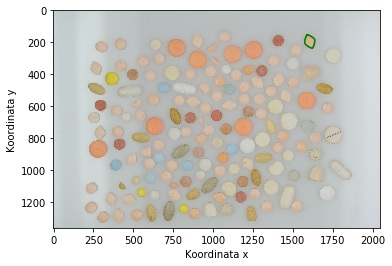

In [7]:
# test funkcije
def plotContour( oContour ):
    """Prikaz konture na sliki"""
    if oContour.size > 0: 
        plt.plot(oContour[0,:], oContour[1,:],'-g')
        plt.plot(oContour[0,(-1,0)], oContour[1,(-1,0)],'-g')
    
oContour = trackContour( iLabel, 3 )
showImage( imgF )
plotContour( oContour )

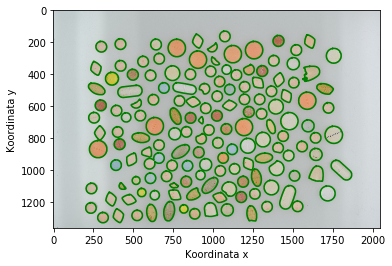

In [8]:
# Dolocimo vse konture na sliki
oContours = []
for iObject in range(0,numL):
    x,y = np.where( iLabel == (iObject+1) )
    # preskoci objekte po velikosti manjse od 10 slikovnih elementov
    if x.size > 10:
        # z uporabe lastne funkcije (Moorov algoritem)
        oContours.append( trackContour( iLabel, iObject+1 ) )
        
# prikazi barvno sliko z osvetlitvijo iz ospredja in obrisi konture
showImage( imgF )
for i in range(len(oContours)): plotContour( oContours[i] )

![Razvrscanje](images/RV_11_SLO_Razvrscanje.png)

4. Napišite funkcijo, ki izloči značilnice označenih objektov na 2D sliki: 
```python
    def extractFeatures( iImage, iLabel ):
        return oFeatures
```
kjer je `iImage` sivinska slika z osvetlitvijo iz ospredja, `iLabel` slika označenih objektov, katerih značilnice želimo izračunati. Funkcija vrne spremenljivko `oFeatures` v obliki vektorja z značilnicami $[A, P, K, \mu_2, G, R]^{\mathrm{T}}$, ki ima dimenzije $6\times N_{obj}$. Značilnice notranjih lastnosti objektov določite na erodirani maski objektov, ki jo dobite z ukazom `iMask = erosion(iLabel, disk(3))`. 

 Narišite 1D histograme posameznih značilnic za vse objekte v sliki. Razmislite katera oz. katere od značilnic bi bile primerne za zaznavo okroglih tablet in tablet z zarezo?

In [16]:
def extractFeaturesSingle( iImage, iMask ):
    """Funkcija za dolocanje znacilnic objekta"""
    # izracun dolzine konture
    def lengthContour( oContour ):
        dC = np.diff( np.hstack( (oContour, oContour[:,0].reshape((2,1))) ), axis=-1 )
        return np.sum( np.sqrt(np.sum(dC**2.0,axis=0)) )
    # doloci konturo objekta
    iMask = iMask.astype('uint8')
    oContour = trackContour( iMask, 1 )
    # doloci zunanje znacilnice podrocja
    A = np.count_nonzero( iMask )
    if A < 10:
        print( 'Objekt %d ima velikost %d < 10' % (iObject, A) )
        return None
    P = lengthContour( oContour )
    K = 4.0 * np.pi * A / (P**2.0)
    # erozija podrocja objekta
    from skimage.morphology import erosion
    from skimage.morphology import disk
    # odstrani sivinsko informacijo na robu
    iMask = erosion( iMask, disk(3) )    
    # izlusci informacijo
    iImageG = toGray( iImage )
    oGx, oGy = imageGradient( iImageG )
    y, x = np.where( iMask>0 )
    # doloci notranje znacilnice podrocja
    p = hist1D( iImageG[y, x].flatten(), iBins=256, iMinVal=0, iMaxVal=255 )
    p = p / ( np.sum( p ) + 1e-7 )    
    m = np.sum( np.array( range(256) ) * p )
    mu2 = np.sum( np.array( range(256) - m )**2.0 * p )
    print(np.array( range(256)))
    G = 1.0 / ( 1.0 + mu2 )
    Gxy = np.vstack( ( oGx[y, x].flatten(),oGy[y, x].flatten() ) )
    Eigvals = np.linalg.eigvals( np.dot( Gxy, Gxy.transpose() ) )
    R = 1 - np.min( Eigvals ) / np.max( Eigvals )
    # sestavi vektor znacilnic in vrni
    oFeatures = np.array( (A,P,K,mu2,G,R) )
    return oFeatures    

In [17]:
# test funkcije
iObject = 3  
oFeatures = extractFeaturesSingle( imgF, iLabel==(iObject+1) )
print('features =',oFeatures)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [11]:
def extractFeatures( iImage, iLabel ):
    """Funkcija za dolocanje znacilnic vseh objektov v sliki"""
    # pripravi vhodne podatke
    iImage = np.asarray( iImage )
    iLabel = np.asarray( iLabel )
    numL = np.max( iLabel )
    # doloci znacilnice za vsak objekt
    oFeatures = np.array( () )
    for iObject in range(numL):
        # izpis poteka izracuna znacilnic
        if iObject==0:
            oFeatures = extractFeaturesSingle( iImage, iLabel == (iObject+1) ).reshape( (1,6) ) 
        else:
            oFeaturesSingle = extractFeaturesSingle( iImage, iLabel == (iObject+1) )
            if oFeaturesSingle is not None:
                oFeaturesSingle = oFeaturesSingle.reshape( (1,6) ) 
                oFeatures = np.vstack( (oFeatures, oFeaturesSingle))
    # koncaj in vrni znacilnice
    return oFeatures

Text(0.5, 0.98, 'Znacilnica R')

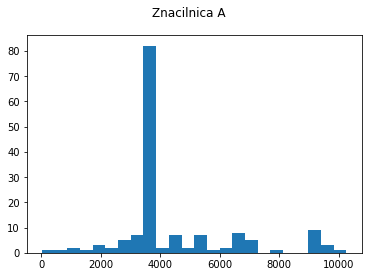

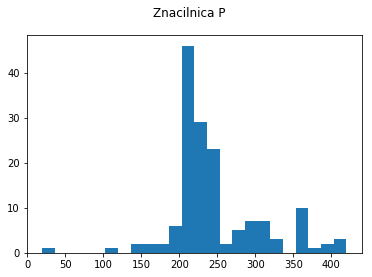

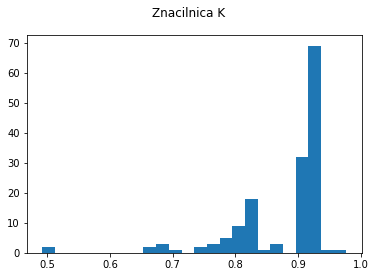

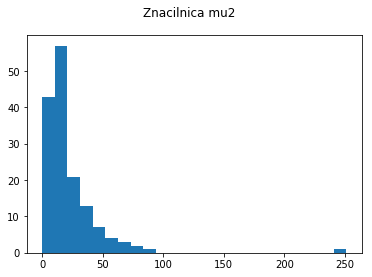

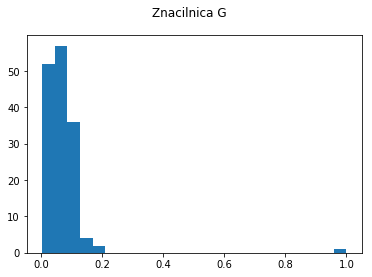

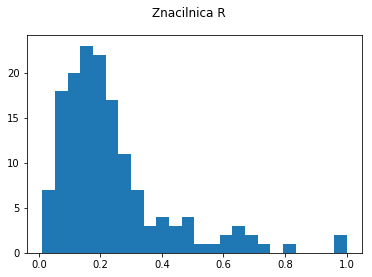

In [12]:
# test funkcije
oFeatures = extractFeatures( imgF, iLabel )
# narisi histograme znacilnic
bins = int(round(np.sqrt(numL))*2)
plt.figure(); plt.hist( oFeatures[:,0], bins=bins ); plt.suptitle( 'Znacilnica A' )# površina
plt.figure(); plt.hist( oFeatures[:,1], bins=bins ); plt.suptitle( 'Znacilnica P' )# kroznost - okroglost
plt.figure(); plt.hist( oFeatures[:,3], bins=bins ); plt.suptitle( 'Znacilnica mu2' )#homogensost - 2. centr. mom.
plt.figure(); plt.hist( oFeatures[:,4], bins=bins ); plt.suptitle( 'Znacilnica G' )# gladkost
plt.figure(); plt.hist( oFeatures[:,5], bins=bins ); plt.suptitle( 'Znacilnica R' )# zareza -> 1, okrogle ->0

5. Na osnovi slik označenih objektov `iLabel` in značilnic $[A, P, K, \mu_2, G, R]^{\mathrm{T}}$ teh objektov načrtajte binarne razvrščevalnike, ki bodo odgovorili na naslednja vprašanja:

     1. Koliko tablet je na sliki?
     2. Koliko tablet je okroglih tablet?
     3. Koliko tablet je okroglih tablet z zarezo?

 Razmislite na kakšen način bi vrednotili zanesljivost delovanja tega procesa razvrščanja.

Na sliki je 151 tablet


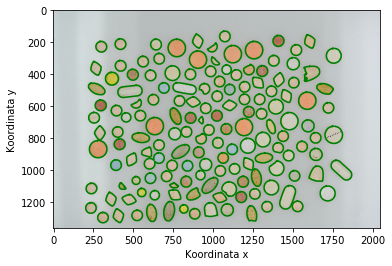

In [13]:
# KOLIKO TABLET JE NA SLIKI?
idxTablete = np.where( (oFeatures[:,0]>500) )[0]
#idxTablete = np.where( (oFeatures[:,0]>500) * (oFeatures[:,0]<12e+3) )[0]
print('Na sliki je %d tablet' % idxTablete.size )
# prikazi barvno sliko z oznacenimi tabletami
showImage( imgF )
for i in range(idxTablete.size): plotContour( oContours[idxTablete[i]] )

Na sliki je 102 okroglih tablet


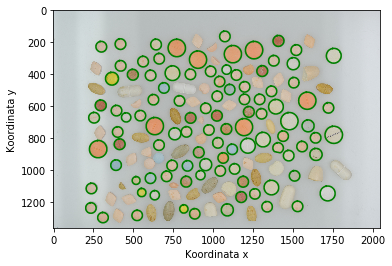

In [14]:
# KOLIKO TABLET JE OKROGLIH?
idxTableteOkrogle = np.where( (oFeatures[idxTablete,2]>0.9) )[0]
#idxTablete = np.where( (oFeatures[:,0]>500) * (oFeatures[:,0]<12e+3) )[0]
print('Na sliki je %d okroglih tablet' % idxTableteOkrogle.size )
# prikazi barvno sliko z oznacenimi tabletami
showImage( imgF )
for i in range(idxTableteOkrogle.size): 
    plotContour( oContours[idxTablete[idxTableteOkrogle[i]]] )

Na sliki je 11 okroglih tablet z zarezo


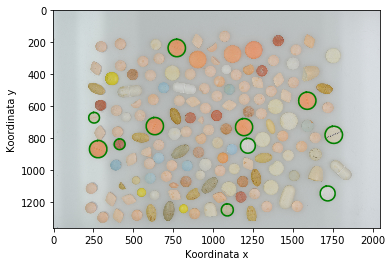

In [15]:
# KOLIKO TABLET JE OKROGLIH Z ZAREZO?
idxTableteOkrogleZareza = np.where( (oFeatures[idxTablete[idxTableteOkrogle],5]>0.4) )[0]
#idxTablete = np.where( (oFeatures[:,0]>500) * (oFeatures[:,0]<12e+3) )[0]
print('Na sliki je %d okroglih tablet z zarezo' % idxTableteOkrogleZareza.size )
# prikazi barvno sliko z oznacenimi tabletami
showImage( imgF )
for i in range(idxTableteOkrogleZareza.size): 
    plotContour( oContours[idxTablete[idxTableteOkrogle[idxTableteOkrogleZareza[i]]]] )

In [21]:
A = np.ones(3)
B = np.ones(3)
C = np.dot(A,B.transpose())
# C = A*B.transpose()
print(C)

3.0


## Dodatne naloge in vprašanja
Dodatne naloge naj služijo za poglobitev spretnosti programiranja, boljšemu razumevanju snovi in vsebine vaje in spoznavanju dodatnih načinov za obdelavo in analizo slik. Opravljanje dodatnih nalog je neobvezno, vendar pa priporočljivo, saj je na nek način to priprava na pisni in ustni izpit.

1. Za namen vrednotenja označite vse objekte v sliki v naslednje razrede:
 * okrogle / podolgovate tablete (pripadajoča značka razreda 1 in 2)
 * tablete z zarezo / brez zareze (pripadajoča značka razreda 4 in 8)
 Značke razredov so določene tako, da jih lahko predstavimo z eno nepredznačeno 8--bitno sliko s po eno značko na bit (v tem primeru koristimo prve štiri bite). Ustvarite tako referenčno masko objektov.

 Določite občutljivost in specifičnost razvrščanja objektov z razvrščevalnikom, ki smo ga razvili pri nalogi 5. 

2. Vrednotite kakovost razvrščanja z uporabo ROC (ang. Receiver Operating Characteristics) krivulje, pri čemer lahko uporabite implementacijo v Python knjižnici `sklearn`, in sicer funkcijo `sklearn.metrics.roc_curve`. Kakovost razvrščanja lahko opredelite z mero površine pod ROC krivuljo (AUC, ang. Area Under the (ROC) Curve) z uporabo funkcije `sklearn.metrics.auc`.

3. Uporabite referenčno masko objektov za učenje razvrščevalnika in vrednotite njegovo kakovost tako, da določite optimalno občutljivost in specifičnost ter AUC. Preizkusite naslednje razvrščevalnike:
 * Naključna drevesa (RF, ang. Random Forests): uporabite implementacijo `RandomForestClassifier` v knjižnici `sklearn.ensemble` (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 * Podporne vektorje (SVM, ang. Support Vector Machines): uporabite implementacijo `svm` v knjižnici `sklearn` (http://scikit-learn.org/stable/modules/svm.html)
 * K najbližjih sosedov (k--NN, ang. k Nearest Neighbors): uporabite implementacijo `NearestNeighbors` v knjižnici `sklearn.neighbors` (http://scikit-learn.org/stable/modules/neighbors.html)
 Za vrednotenje razvščevalnika je smiselno uporabiti križno validacijo, tj. učiti na delu podatkov in testirati na preostanku in nato še obratno. Delitev podatkov lahko naredite s funkcijo `train_test_split()` (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) v knjižnici `sklearn.model_selection`. Končne rezultate nato dobite s povprečenjem rezultatov pridobljenih na posameznih delih podatkov.